In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
DATA_PATH = "data/LoanApprovalPredictionDataset.csv"

df = pd.read_csv(DATA_PATH)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Print the first rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Print the last rows of dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Print the Shape of the Dataset
df.shape

(614, 13)

In [6]:
# Print the columns of the Dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# Get the Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Check the missing values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Percentage of missing values
missing_percent = round((df.isnull().sum() / len(df)) * 100, 2)
print("Missing Value Percentage")
print(missing_percent)

Missing Value Percentage
Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64


In [10]:
# Quick descriptive Stats for numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Number of people who took the loan by 'Loan_Status'
Loan_Status
Y    422
N    192
Name: count, dtype: int64


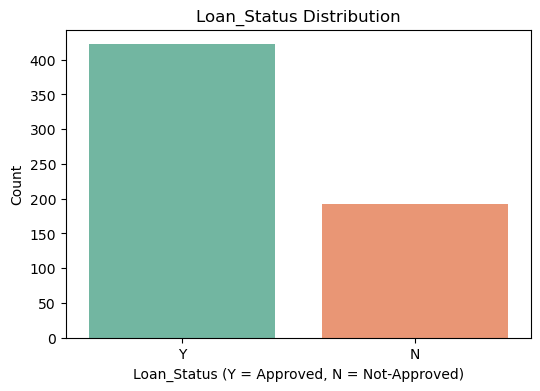

In [12]:
# Target Variable Distribution

# Print the number of people who took the loan in 'Loan_Status'
print("Number of people who took the loan by 'Loan_Status'")
print(df['Loan_Status'].value_counts())

# Creating the count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Loan_Status", palette="Set2")
plt.title("Loan_Status Distribution")
plt.xlabel("Loan_Status (Y = Approved, N = Not-Approved)")
plt.ylabel("Count")
plt.show()

In [13]:
# Ratio of Target Distribution
round(df['Loan_Status'].value_counts(normalize=True) * 100, 2)

Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64

In [14]:
# Get the info about dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


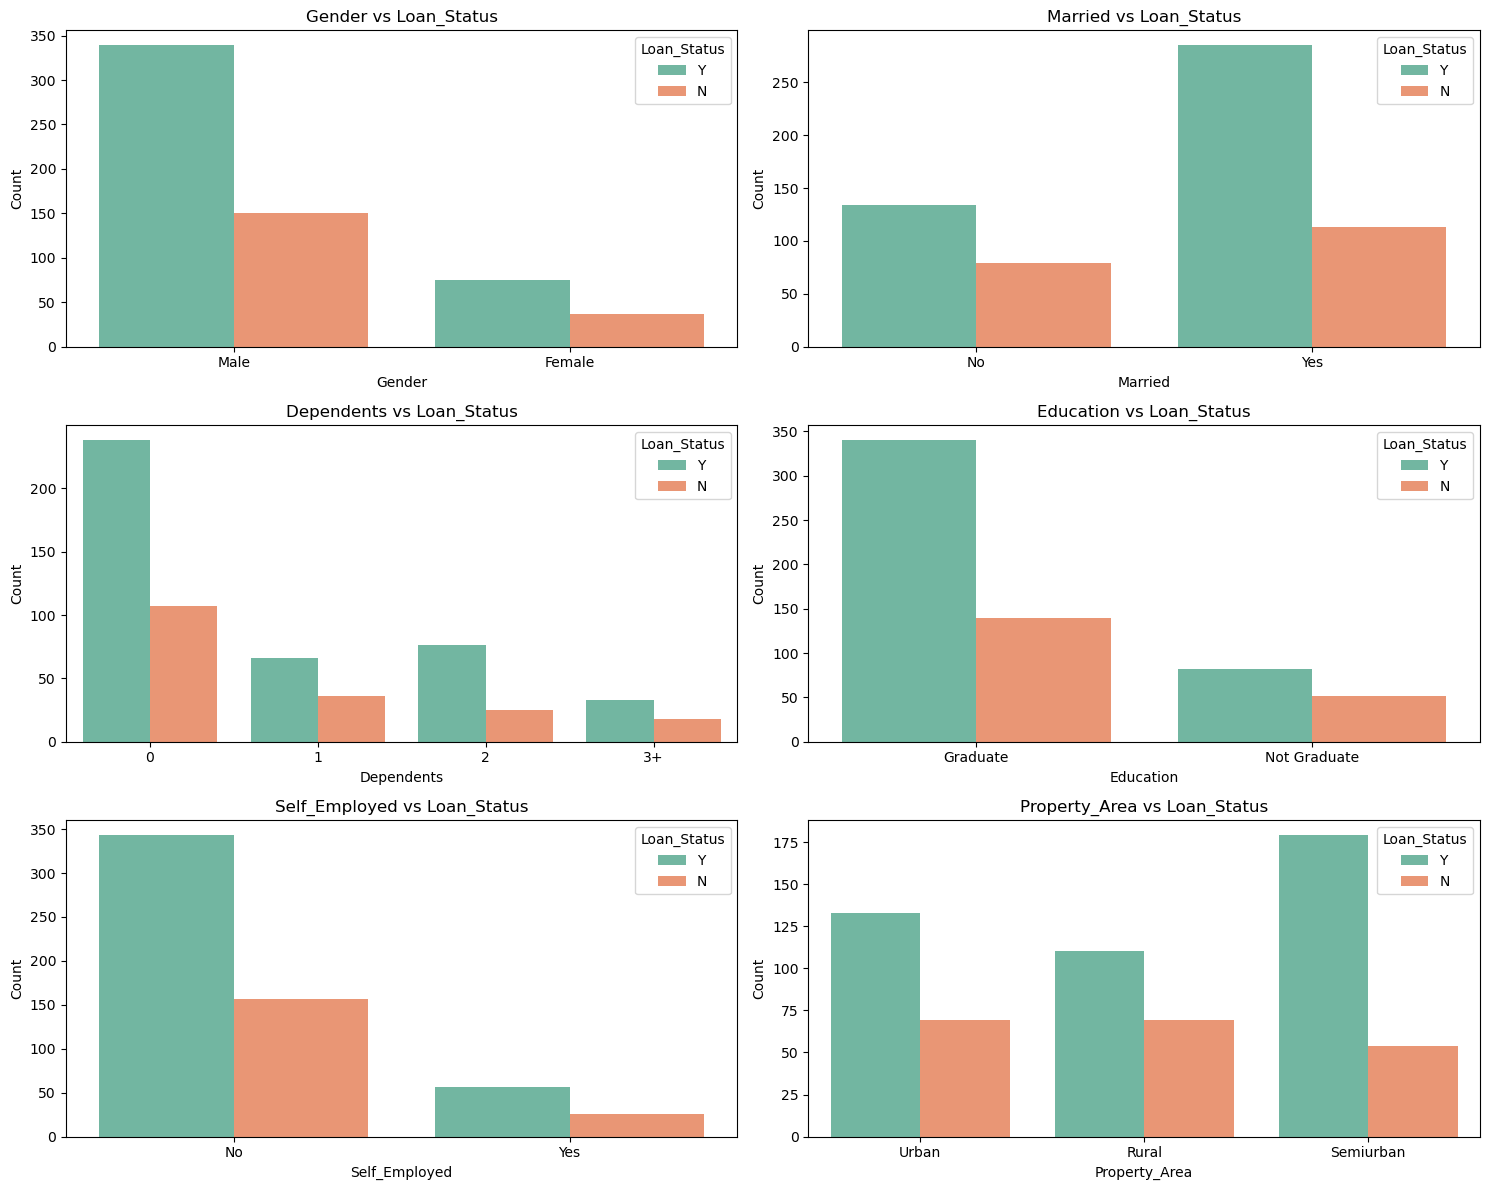

In [15]:
# Categorical features vs Loan_Status

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue="Loan_Status", palette="Set2")
    plt.title(f"{col} vs Loan_Status")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [16]:
# Get the info about dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


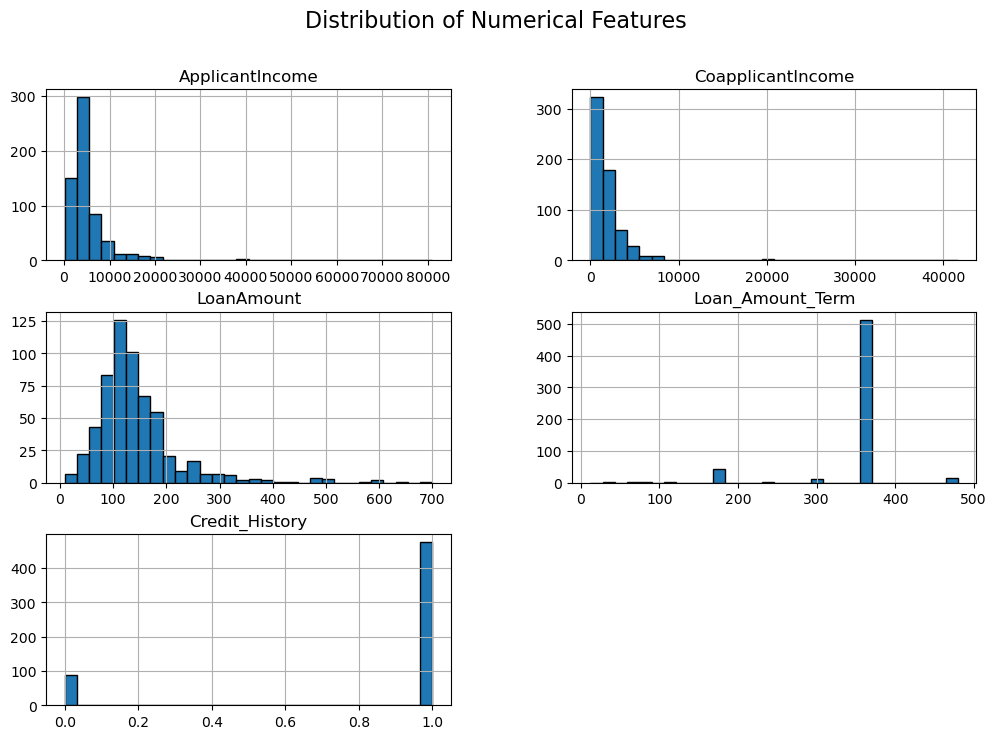

In [17]:
# Numerical Feature Analysis

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Histograms
df[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

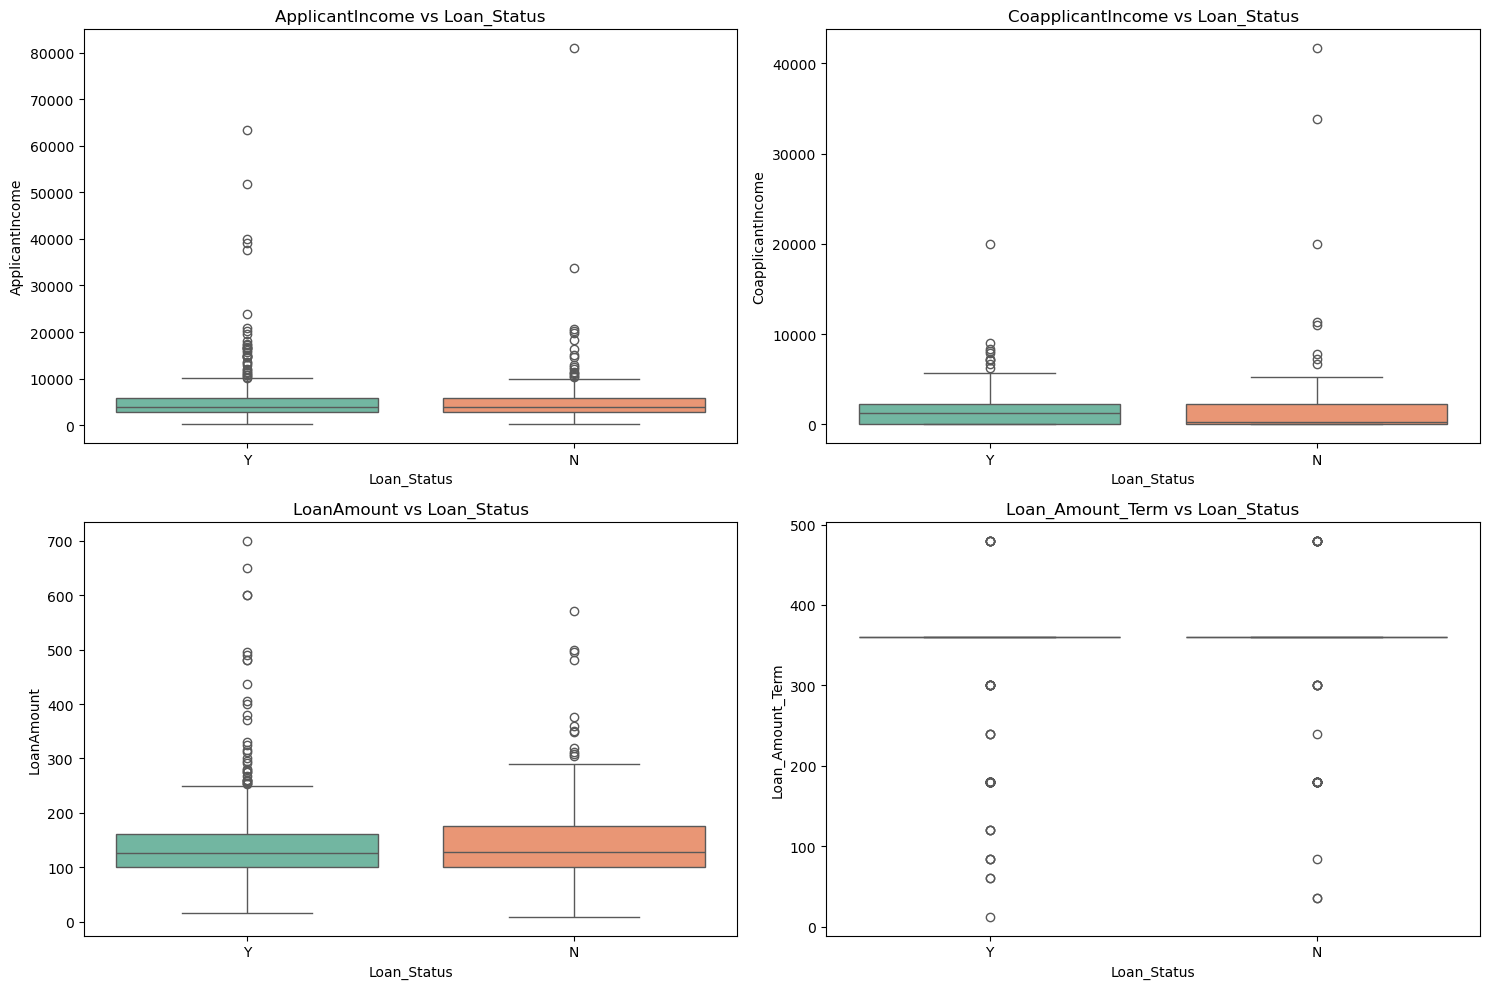

In [22]:
# Box-Plots vs Loan_Status

numerical_cols_upd = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols_upd, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="Loan_Status", y=col, palette="Set2")
    plt.title(f"{col} vs Loan_Status")

plt.tight_layout()
plt.show()

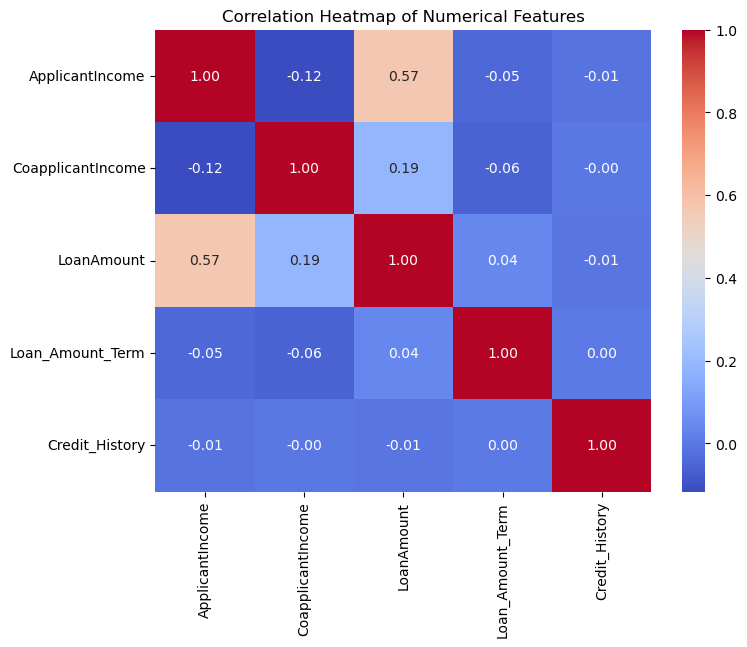

In [23]:
# Correlation Heatmap

plt.figure(figsize=(8, 6))
corr = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cbar=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [24]:
# Data Preprocessing

# Sometimes kaggle files have an index column named 'Unnamed: 0' - drop if it is present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [25]:
# Get the shape of dataset
df.shape

(614, 13)

In [26]:
# Get the first rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
# Get the datatypes of each feature
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
# Check the Missing values again
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
# Copy the Original Dataset
df_prep = df.copy()

In [30]:
# Drop the ID Column (if present)
if 'Loan_ID' in df_prep.columns:
    df_prep.drop(columns=['Loan_ID'], inplace=True)

In [31]:
# Dependents: convert '3+' to 3
df_prep['Dependents'] = df_prep['Dependents'].replace("3+", "3")

In [ ]:
# Print the categorical columns and Numerical Columns
print(categorical_cols)
print(numerical_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [33]:
# Check the missing values again.
df_prep.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
# Handling the Missing Values

# Fill missing values in 'Gender' with Most Frequent Values
df_prep['Gender'] = df_prep['Gender'].fillna(df_prep['Gender'].mode()[0])

# Fill the missing value in 'Married' with most frequent values
df_prep['Married'] = df_prep['Married'].fillna(df_prep['Married'].mode()[0])

# Fill the missing value in 'Dependents' with most frequent values
df_prep['Dependents'] = df_prep['Dependents'].fillna(df_prep['Dependents'].mode()[0])

# Fill the missing value in 'Self_Employed' with most frequent values
df_prep['Self_Employed'] = df_prep['Self_Employed'].fillna(df_prep['Self_Employed'].mode()[0])

# Fill the missing values in 'LoanAmount' with the median
df_prep['LoanAmount'] = df_prep['LoanAmount'].fillna(df_prep['LoanAmount'].median())

# Fill the missing values in 'Loan_Amount_Term' with the mean
df_prep['Loan_Amount_Term'] = df_prep['Loan_Amount_Term'].fillna(df_prep['Loan_Amount_Term'].mean())

# Fill the missing values in 'Credit_History' with the mean
df_prep['Credit_History'] = df_prep['Credit_History'].fillna(df_prep['Credit_History'].mean())

In [35]:
# Verify no missing values left
df_prep.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by 'Gender'
Gender
Male      502
Female    112
Name: count, dtype: int64


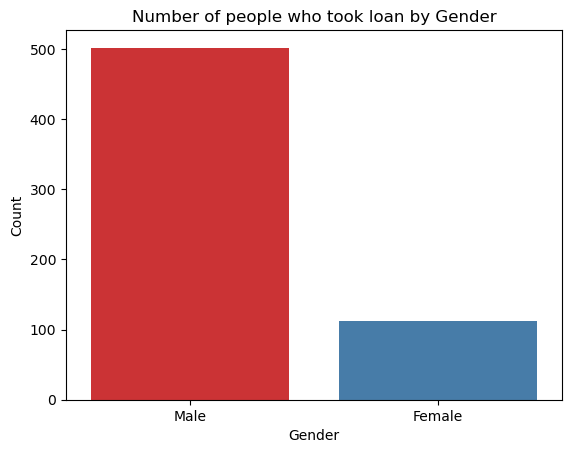

In [36]:
# Print the number of people who applied for the by 'Gender'

print("Number of people who took loan by 'Gender'")
print(df_prep['Gender'].value_counts())

# Creating the plot
sns.countplot(x="Gender", data=df_prep, palette="Set1")
plt.title("Number of people who took loan by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Number of people who took the loan by Maritial Status
Married
Yes    401
No     213
Name: count, dtype: int64


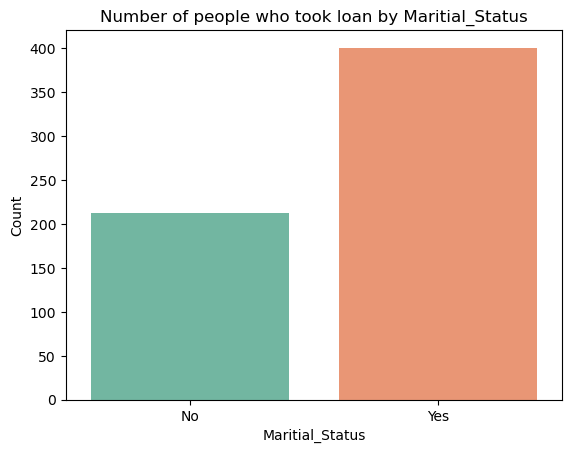

In [37]:
# By Maritial Status
print("Number of people who took the loan by Maritial Status")
print(df_prep['Married'].value_counts())

# Create a plot
sns.countplot(x="Married", data=df_prep, palette="Set2")
plt.title("Number of people who took loan by Maritial_Status")
plt.xlabel("Maritial_Status")
plt.ylabel("Count")
plt.show()

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


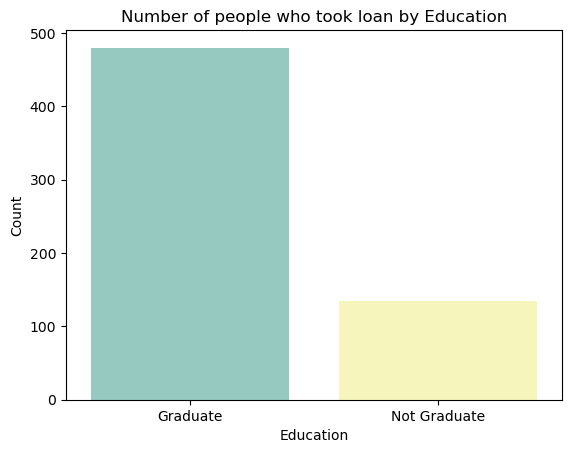

In [39]:
# By Education
print("Number of people who took loan by Education")
print(df_prep['Education'].value_counts())

# Create a plot
sns.countplot(x="Education", data=df_prep, palette="Set3")
plt.title("Number of people who took loan by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

In [40]:
# Calculate the 'TotalApplicantIncome' for each entry
df_prep['TotalApplicantIncome'] = df_prep['ApplicantIncome'] + df_prep['CoapplicantIncome']

In [41]:
# Get the First Few rows
df_prep.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


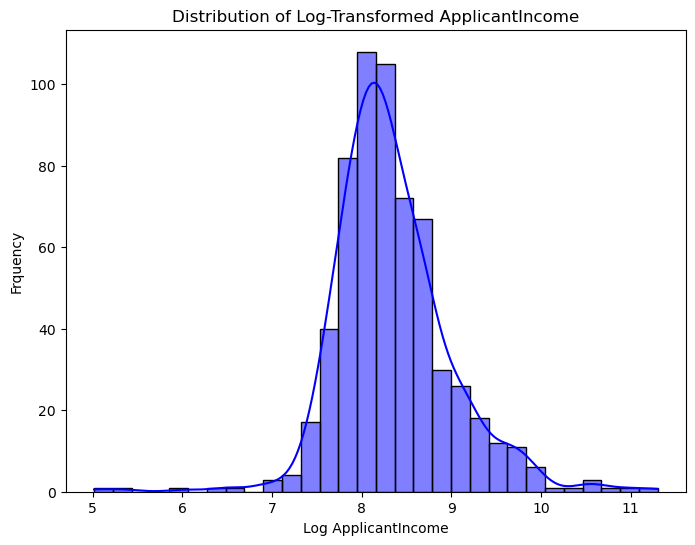

In [42]:
# Apply the Log Transformation to 'ApplicantIncome'

df_prep['ApplicantIncomeLog'] = np.log(df_prep['ApplicantIncome'] + 1)

# Create a distribution plot for log transformed ApplicantIncome
plt.figure(figsize=(8, 6))
sns.histplot(df_prep['ApplicantIncomeLog'], kde=True, color="blue", bins=30)
plt.title("Distribution of Log-Transformed ApplicantIncome")
plt.xlabel("Log ApplicantIncome")
plt.ylabel("Frquency")
plt.show()

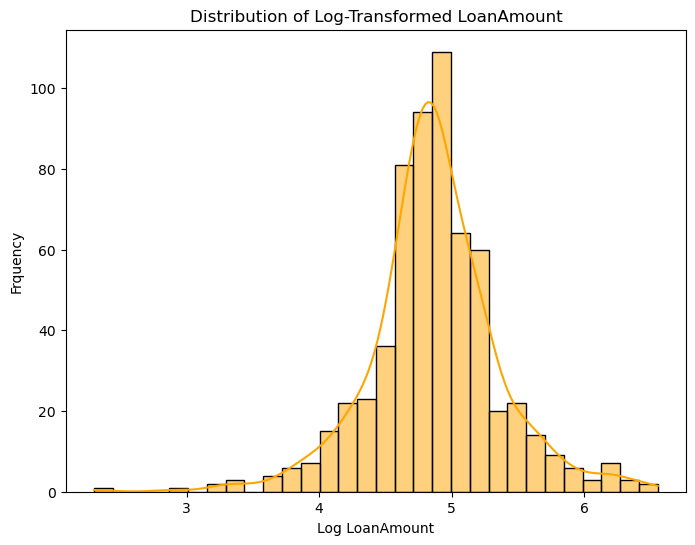

In [43]:
# Apply the Log Transformation to 'LoanAmount'
df_prep['LoanAmountLog'] = np.log(df_prep['LoanAmount'] + 1)

# Create a distribution plot for log transformed LoanAmount
plt.figure(figsize=(8, 6))
sns.histplot(df_prep['LoanAmountLog'], kde=True, color="orange", bins=30)
plt.title("Distribution of Log-Transformed LoanAmount")
plt.xlabel("Log LoanAmount")
plt.ylabel("Frquency")
plt.show()

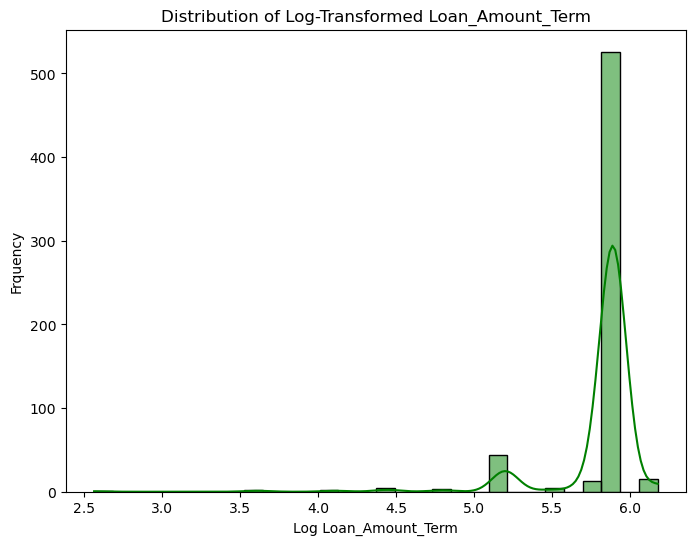

In [ ]:
# Apply the Log Transformation to 'Loan_Amount_Term'
df_prep['Loan_Amount_Term_Log'] = np.log(df_prep['Loan_Amount_Term'] + 1)

# Create a distribution plot for log transformed Loan_Amount_Term
plt.figure(figsize=(8, 6))
sns.histplot(df_prep['Loan_Amount_Term_Log'], kde=True, color="green", bins=30)
plt.title("Distribution of Log-Transformed Loan_Amount_Term")
plt.xlabel("Log Loan_Amount_Term")
plt.ylabel("Frquency")
plt.show()

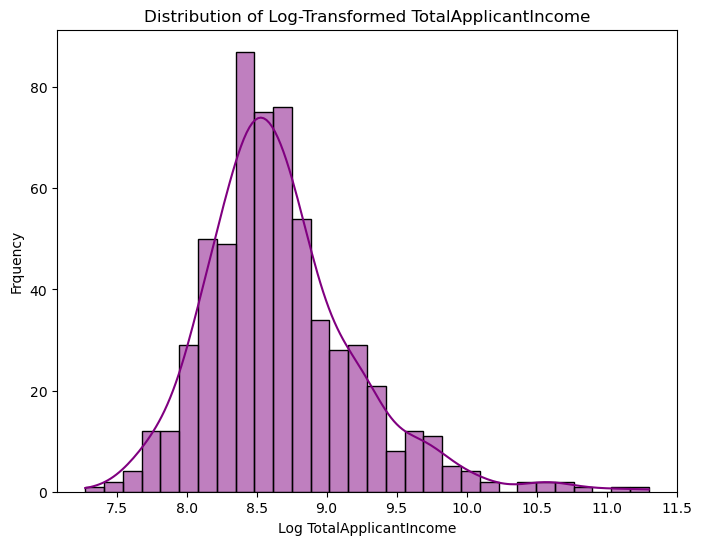

In [46]:
# Apply the Log Transformation to 'TotalApplicantIncome'
df_prep['TotalApplicantIncomeLog'] = np.log(df_prep['TotalApplicantIncome'] + 1)

# Create a distribution plot for log transformed TotalApplicantIncome
plt.figure(figsize=(8, 6))
sns.histplot(df_prep['TotalApplicantIncomeLog'], kde=True, color="purple", bins=30)
plt.title("Distribution of Log-Transformed TotalApplicantIncome")
plt.xlabel("Log TotalApplicantIncome")
plt.ylabel("Frquency")
plt.show()

In [48]:
# Get the few rows of dataset
df_prep.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalApplicantIncomeLog
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [49]:
# Check the existing columns
df_prep.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalApplicantIncome', 'ApplicantIncomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'TotalApplicantIncomeLog'],
      dtype='object')

In [50]:
# List of columns to drop (Modify this based on existing columns)
columns_to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Drop the specified columns
df_prep.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [51]:
# Get the first few rows of dataset
df_prep.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalApplicantIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [52]:
# Get the columns which are present in updated dataset
df_prep.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalApplicantIncome', 'ApplicantIncomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'TotalApplicantIncomeLog'],
      dtype='object')

In [53]:
# Encoding the Categorical Variable

# Label Encoding

# Import the necessary Libraries
from sklearn.preprocessing import LabelEncoder

# Specify the columns to be label encoded.
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Initialize the label Encoder
le = LabelEncoder()

# Apply label Encoding to each specified columns
for col in cols:
    df_prep[col] = le.fit_transform(df_prep[col])
    
# Display the first few rows
df_prep.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalApplicantIncomeLog
0,1,0,0,0,0,1.0,2,1,5849.0,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,6091.0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,3000.0,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,4941.0,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,6000.0,8.699681,4.955827,5.888878,8.699681


In [55]:
# Check the Datatypes of each feature now
df_prep.dtypes

Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
Credit_History             float64
Property_Area                int64
Loan_Status                  int64
TotalApplicantIncome       float64
ApplicantIncomeLog         float64
LoanAmountLog              float64
Loan_Amount_Term_Log       float64
TotalApplicantIncomeLog    float64
dtype: object

In [56]:
# Split the Independent and Dependent Features

# Define the Independent feature (x) by dropping the target varibale 'Loan_Status'
X = df_prep.drop(columns=['Loan_Status'], axis=1)

# Define the dependent feature (y) as the target varibale 'Loan_Status'
y = df_prep['Loan_Status']

# Display shapes of X and y to verify the split
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (614, 12)
Shape of y:  (614,)


In [57]:
# Feature Scaling

# Import necessary Libraries
from sklearn.model_selection import train_test_split

# Apply the Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)


In [58]:
# Print the Shape of Train and test set
print("Train shape of X:", X_train.shape)
print("Test shape of X:", X_test.shape)

Train shape of X: (491, 12)
Test shape of X: (123, 12)


In [61]:
# Print the target distribution of train and test set
print("Train target distribution:\n", round(y_train.value_counts(normalize=True) * 100, 2))
print("Test target distribution:\n", round(y_test.value_counts(normalize=True) * 100, 2))

Train target distribution:
 Loan_Status
1    68.64
0    31.36
Name: proportion, dtype: float64
Test target distribution:
 Loan_Status
1    69.11
0    30.89
Name: proportion, dtype: float64


In [62]:
# Save processed data
X_train.to_csv("data/approval_X_train.csv", index=False)
X_test.to_csv("data/approval_X_test.csv", index=False)
y_train.to_csv("data/approval_y_train.csv", index=False)
y_test.to_csv("data/approval_y_test.csv", index=False)
print("Saved processed train/test CSVs in data/")

Saved processed train/test CSVs in data/


In [63]:
# Feature Scaling for numerical features

# Import Necessary Library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Result
Accuracy:  85.37

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



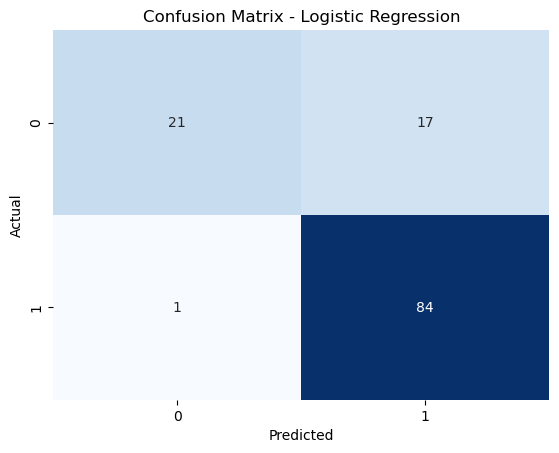

In [65]:
# Model Training

# 1. logistic Regression
# Import Necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the logistic Regression on scaled data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make the Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Result")
print("Accuracy: ", round(accuracy_score(y_test, y_pred_lr) * 100 , 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Results
Accuracy: 86.18

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.66      0.75        38
           1       0.86      0.95      0.91        85

    accuracy                           0.86       123
   macro avg       0.86      0.81      0.83       123
weighted avg       0.86      0.86      0.86       123



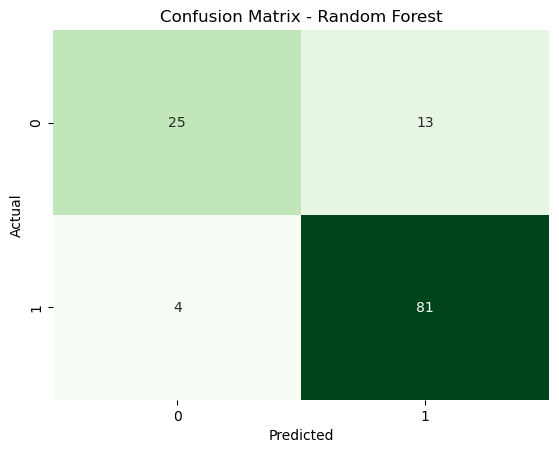

In [66]:
# 2. Random Forest Classifier

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Model (on Raw Unscaled Data)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make the predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost Results
Accuracy: 81.3

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68        38
           1       0.84      0.89      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.76      0.77       123
weighted avg       0.81      0.81      0.81       123



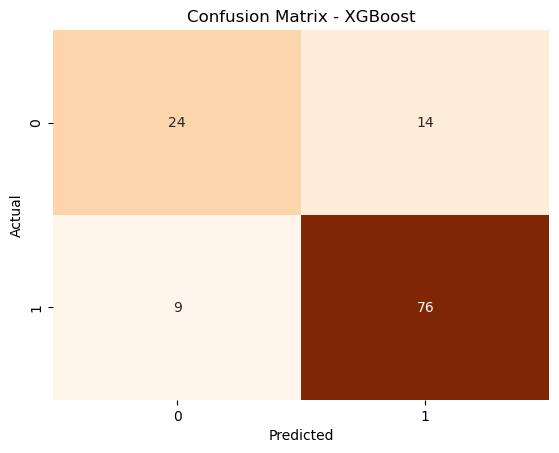

In [67]:
# 3. XGBoost Classifier

# Import Necessary Libraries
from xgboost import XGBClassifier

# Train the XGBoost Model
xgb_model = XGBClassifier(n_estimator=200, max_depth=4, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make the Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

LightGBM Results
Accuracy: 83.74

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123



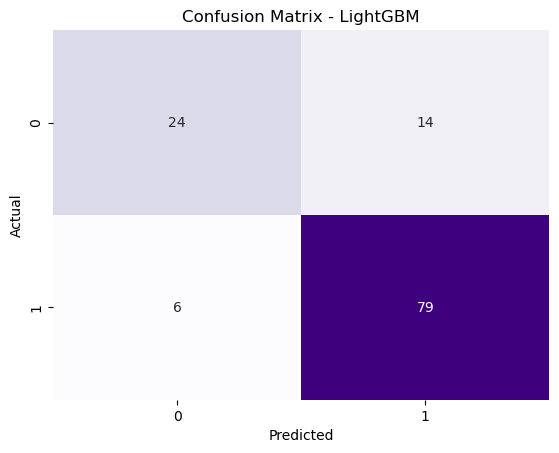

In [69]:
# 4. LIGHTGBM Classifier

# Import necessary Libraries
from lightgbm import LGBMClassifier

# Train LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
lgbm_model.fit(X_train, y_train)

# Make Predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Model Evaluation
print("LightGBM Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lgbm) * 100, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
# Model Comparison Table

# Import Necessary Libraries
from sklearn.metrics import f1_score

# Collect Results
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgbm)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_lgbm)
    ]
}

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(results_df)

,Model,Accuracy,F1 Score
1,Random Forest,0.861789,0.905028
0,Logistic Regression,0.853659,0.903226
3,LightGBM,0.837398,0.887640
2,XGBoost,0.813008,0.868571


In [73]:
# Hyperparameter Tuning for Random Forest

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

# Fit
grid_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

# Use the tuned model
best_rf = grid_rf.best_estimator_

# Evaluate on test set
y_pred_best_rf = best_rf.predict(X_test)
print("Test Accuracy (Tuned RF):", accuracy_score(y_test, y_pred_best_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.7983920841063699
Test Accuracy (Tuned RF): 0.8455284552845529


In [77]:
# Save model + scaler only
import joblib

joblib.dump(best_rf, "models/loan_approval_best_rf_model.pkl")
joblib.dump(scaler, "models/loan_approval_scaler.pkl")

['models/loan_approval_scaler.pkl']

In [83]:
# Deployment-friendly real_time_prediction (robust to feature-name differences)
import pandas as pd
import numpy as np
import joblib
import os

# Try loading the model from a few likely filenames
model_paths = [
    "models/loan_approval_best_rf_model.pkl",
    "loan_approval_best_rf_model.pkl"
    "loan_approval_best_model.pkl",
    "loan_approval_best_rf_model.pkl",
    "random_forest_model.pkl",
    "models/approval_randomforest.pkl",
    "models/approval_best_rf_model.pkl",
]
best_model = None
for p in model_paths:
    if os.path.exists(p):
        try:
            best_model = joblib.load(p)
            print(f"Loaded model from: {p}")
            model_path_used = p
            break
        except Exception as e:
            print(f"Failed to load {p}: {e}")

if best_model is None:
    raise FileNotFoundError("Could not find a saved model. Make sure one of the expected model files exists.")

# Try load scaler if present
scaler = None
scaler_paths = ["loan_approval_scaler.pkl", "models/approval_scaler.pkl", "models/scaler.pkl"]
for sp in scaler_paths:
    if os.path.exists(sp):
        try:
            scaler = joblib.load(sp)
            print(f"Loaded scaler from: {sp}")
            break
        except Exception:
            scaler = None

# Determine expected feature names
expected_features = None
if hasattr(best_model, "feature_names_in_"):
    expected_features = list(best_model.feature_names_in_)
    print("Model.feature_names_in_ found.")
else:
    # try to load saved feature list if present
    try:
        expected_features = joblib.load("models/approval_feature_names.pkl")
        print("Loaded feature names from models/approval_feature_names.pkl")
    except Exception:
        expected_features = None

if expected_features is None:
    print("WARNING: Could not auto-detect expected feature names. The model may have been trained on a different pipeline.")
    print("You can inspect best_model to find the features used at training time.")
    # But we continue and will still try to build a sensible input.

# helper: mapping for categorical entries used in training (adjust if your training used different mapping)
gender_map = {"Male": 0, "Female": 1}
married_map = {"No": 0, "Yes": 1}
education_map = {"Not Graduate": 0, "Graduate": 1}
self_employed_map = {"No": 0, "Yes": 1}
credit_map = {"No": 0, "Yes": 1}
property_map = {"Rural": 0, "Semiurban": 1, "Urban": 2}

def get_input(prompt, cast=str, valid=None, default=None):
    v = input(prompt)
    if v == "" and default is not None:
        return default
    try:
        return cast(v)
    except Exception:
        return v

def build_feature_dict_from_user():
    # Collect raw user inputs
    gender_input = get_input("Enter Gender (Male/Female): ", str)
    married_input = get_input("Enter Marital Status (Yes/No): ", str)
    dependents_input = get_input("Enter Number of Dependents (0,1,2,3+): ", str)
    education_input = get_input("Enter Education Status (Graduate/Not Graduate): ", str)
    self_employed_input = get_input("Enter Self Employed Status (Yes/No): ", str)
    credit_history_input = get_input("Enter Credit History (Yes/No): ", str)
    property_area_input = get_input("Enter Property Area (Rural/Semiurban/Urban): ", str)
    applicant_income = float(get_input("Enter Applicant Income: ", float))
    coapplicant_income = float(get_input("Enter Coapplicant Income: ", float))
    loan_amount = float(get_input("Enter Loan Amount Requested: ", float))
    loan_amount_term = float(get_input("Enter Loan Amount Term (in months): ", float))

    # Standardize dependents
    dependents_numeric = 3 if dependents_input.strip() == "3+" else int(dependents_input)

    # Basic categorical numeric encodings (label style)
    gender_code = gender_map.get(gender_input, -1)
    married_code = married_map.get(married_input, -1)
    education_code = education_map.get(education_input, -1)
    self_employed_code = self_employed_map.get(self_employed_input, -1)
    credit_code = credit_map.get(credit_history_input, -1)
    property_code = property_map.get(property_area_input, -1)

    # Feature engineering used in training (create many variants so names match whatever the model expects)
    total_income = applicant_income + coapplicant_income

    # log transforms (use log1p which is robust to zero)
    feat = dict()
    feat["ApplicantIncome"] = applicant_income
    feat["CoapplicantIncome"] = coapplicant_income
    feat["LoanAmount"] = loan_amount
    feat["Loan_Amount_Term"] = loan_amount_term
    feat["Total_Applicant_Income"] = total_income
    feat["TotalIncome"] = total_income  # alternate name

    # log variants (many names covered)
    feat["ApplicantIncomeLog"] = np.log1p(applicant_income)
    feat["ApplicantIncomelog"] = np.log1p(applicant_income)
    feat["Log_ApplicantIncome"] = np.log1p(applicant_income)
    feat["Total_Applicant_Income_Log"] = np.log1p(total_income)
    feat["Log_TotalIncome"] = np.log1p(total_income)
    feat["TotalIncomeLog"] = np.log1p(total_income)
    feat["LoanAmountLog"] = np.log1p(loan_amount)
    feat["Log_LoanAmount"] = np.log1p(loan_amount)
    feat["Loan_Amount_Term_Log"] = np.log1p(loan_amount_term)

    # ratio features (if you created them)
    feat["LoanAmount_to_Income"] = loan_amount / (total_income + 1)
    feat["Income_per_Dependent"] = total_income / (dependents_numeric + 1)
    feat["Dependents"] = dependents_numeric

    # categorical label columns (if your training used label encoding)
    feat["Gender"] = gender_code
    feat["Married"] = married_code
    feat["Education"] = education_code
    feat["Self_Employed"] = self_employed_code
    feat["Credit_History"] = credit_code
    feat["Property_Area"] = property_code

    # One-hot style columns (in case model used get_dummies)
    # Create flags like Gender_Male, Married_Yes, Education_Graduate, Property_Area_Urban, etc.
    feat["Gender_Male"] = 1 if gender_input == "Male" else 0
    feat["Gender_Female"] = 1 if gender_input == "Female" else 0
    feat["Married_Yes"] = 1 if married_input == "Yes" else 0
    feat["Education_Graduate"] = 1 if education_input == "Graduate" else 0
    feat["Self_Employed_Yes"] = 1 if self_employed_input == "Yes" else 0
    feat["Property_Area_Urban"] = 1 if property_area_input == "Urban" else 0
    feat["Property_Area_Semiurban"] = 1 if property_area_input == "Semiurban" else 0
    feat["Property_Area_Rural"] = 1 if property_area_input == "Rural" else 0
    # Credit history one hot
    feat["Credit_History_1.0"] = 1 if credit_history_input == "Yes" else 0
    feat["Credit_History_0.0"] = 1 if credit_history_input == "No" else 0

    # Also include defaults for any other column variants (helps avoid KeyError)
    return feat

def real_time_prediction():
    feat = build_feature_dict_from_user()

    # If we know expected features, build DataFrame accordingly
    if expected_features is not None:
        # Print expected features for debug
        print("\nModel expected features (first 50 shown):")
        print(expected_features[:50])

        # Build final input row containing the expected_features in exact order
        row = {}
        for col in expected_features:
            # If feature available in our computed feat dict, use it; otherwise default to 0
            row[col] = feat.get(col, 0)

        input_df = pd.DataFrame([row], columns=expected_features)
    else:
        # If we don't know expected features, assemble using our computed keys (best-effort)
        cols = list(feat.keys())
        input_df = pd.DataFrame([feat], columns=cols)

    # Apply scaler if present (only to numeric columns that exist)
    if scaler is not None:
        # pick plausible numeric columns to scale if they exist in input_df
        possible_scale_cols = [
            "ApplicantIncome","CoapplicantIncome","Total_Applicant_Income","TotalIncome",
            "LoanAmount","Loan_Amount_Term","LoanAmount_to_Income",
            "ApplicantIncomeLog","Log_ApplicantIncome","LoanAmountLog","Total_Applicant_Income_Log",
            "Income_per_Dependent","Loan_Amount_Term_Log"
        ]
        scale_cols = [c for c in possible_scale_cols if c in input_df.columns]
        if len(scale_cols) > 0:
            try:
                input_df[scale_cols] = scaler.transform(input_df[scale_cols])
                print("Applied scaler to columns:", scale_cols)
            except Exception as e:
                print("Scaler transform failed; continuing without scaling. Error:", e)

    # Final check that column set matches model expectations (helpful debugging)
    if hasattr(best_model, "feature_names_in_"):
        model_cols = list(best_model.feature_names_in_)
        missing = set(model_cols) - set(input_df.columns)
        extra = set(input_df.columns) - set(model_cols)
        if missing:
            print("\nWARNING: These expected columns are missing from input (they will be filled with 0):")
            print(sorted(list(missing))[:50])
            # add missing with zeros
            for c in missing:
                input_df[c] = 0
        if extra:
            print("\nNOTE: Input contains extra columns not expected by model (they will be ignored):")
            print(sorted(list(extra))[:50])
            # drop extras
            input_df = input_df[model_cols]

    # Predict
    try:
        pred = best_model.predict(input_df)[0]
        proba = None
        if hasattr(best_model, "predict_proba"):
            proba = best_model.predict_proba(input_df)[0]
    except Exception as e:
        print("Error while predicting:", e)
        print("Model expects these columns:")
        if expected_features is not None:
            print(expected_features)
        raise

    # Adjusted loan amount logic (same as you requested)
    dependents_val = feat.get("Dependents", 0)
    if pred == 1:
        # Approved
        adjustment_factor = max(0.7, 1 - (0.1 * dependents_val))  # min factor 0.7
        adjusted_loan_amount = float(feat.get("LoanAmount", 0)) * adjustment_factor
        print("\nLoan Status Prediction: Approved")
        print(f"Eligible Loan Amount (adjusted for dependents): {adjusted_loan_amount:.2f} out of {feat.get('LoanAmount', 0):.2f}")
        if proba is not None:
            print(f"Model probability (class 1): {proba[1]:.3f}")
    else:
        # Rejected
        print("\nLoan Status Prediction: Rejected")
        if proba is not None:
            print(f"Model probability (class 1): {proba[1]:.3f}")
        print("No loan amount will be disbursed.")

# Run
real_time_prediction()

Loaded model from: models/loan_approval_best_rf_model.pkl
Model.feature_names_in_ found.

Model expected features (first 50 shown):
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'TotalApplicantIncome', 'ApplicantIncomeLog', 'LoanAmountLog', 'Loan_Amount_Term_Log', 'TotalApplicantIncomeLog']

Loan Status Prediction: Rejected
Model probability (class 1): 0.438
No loan amount will be disbursed.


In [84]:
# Use the resampling Technique

from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

Before SMOTE: Loan_Status
1    337
0    154
Name: count, dtype: int64
After SMOTE: Loan_Status
1    337
0    337
Name: count, dtype: int64


In [85]:
# Retrain Random Forest on SMOTE data
rf_smote = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5)
rf_smote.fit(X_train_resampled, y_train_resampled)

rf_smote_pred = rf_smote.predict(X_test)
rf_smote_acc = accuracy_score(y_test, rf_smote_pred)
print("Random Forest (with SMOTE) Accuracy:", rf_smote_acc)

Random Forest (with SMOTE) Accuracy: 0.8373983739837398


In [86]:
# Retrain XGBoost on SMOTE data
xgb_smote = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb_smote.fit(X_train_resampled, y_train_resampled)

xgb_smote_pred = xgb_smote.predict(X_test)
xgb_smote_acc = accuracy_score(y_test, xgb_smote_pred)
print("XGBoost (with SMOTE) Accuracy:", xgb_smote_acc)

XGBoost (with SMOTE) Accuracy: 0.8130081300813008


In [87]:
print("\nRandom Forest (SMOTE):")
print(classification_report(y_test, rf_smote_pred))

print("\nXGBoost (SMOTE):")
print(classification_report(y_test, xgb_smote_pred))


Random Forest (SMOTE):
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123


XGBoost (SMOTE):
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        38
           1       0.85      0.88      0.87        85

    accuracy                           0.81       123
   macro avg       0.78      0.77      0.78       123
weighted avg       0.81      0.81      0.81       123



In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": [None, "balanced"]
}

# Initialize GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

# Fit on SMOTE-resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8309673852957434


In [89]:
from sklearn.metrics import accuracy_score, classification_report

# Get best model
best_rf = grid_search.best_estimator_

# Predictions on test set
y_pred = best_rf.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8048780487804879

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.86      0.86      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.77      0.77       123
weighted avg       0.80      0.80      0.80       123



In [90]:
import joblib

# Save tuned model
joblib.dump(best_rf, "models/loan_approval_best_rf.pkl")
print("Best Random Forest model saved as loan_approval_best_rf.pkl")

Best Random Forest model saved as loan_approval_best_rf.pkl


In [98]:
import pandas as pd
import numpy as np
import joblib

# Load the saved best model
best_model = joblib.load("models/loan_approval_best_rf.pkl")

# Function to map categorical inputs to numeric
def convert_input_to_numeric(user_input, mapping):
    return mapping.get(user_input, -1)  # -1 = invalid input

# Deployment Simulation
def real_time_prediction():
    try:
        # Collect user input
        gender_input = input("Enter Gender (Male/Female): ")
        married_input = input("Enter Marital Status (Yes/No): ")
        dependents_input = input("Enter Number of Dependents (0,1,2,3+): ")
        education_input = input("Enter Education (Graduate/Not Graduate): ")
        self_employed_input = input("Enter Self Employed (Yes/No): ")
        credit_history_input = input("Enter Credit History (Yes/No): ")
        property_area_input = input("Enter Property Area (Rural/Semiurban/Urban): ")
        applicant_income = float(input("Enter Applicant Income: "))
        coapplicant_income = float(input("Enter Coapplicant Income: "))
        loan_amount = float(input("Enter Loan Amount Requested: "))
        loan_amount_term = float(input("Enter Loan Amount Term (in months): "))

        # Convert categorical to numeric (same encoding used during training)
        gender = convert_input_to_numeric(gender_input, {"Male": 0, "Female": 1})
        married = convert_input_to_numeric(married_input, {"Yes": 1, "No": 0})
        dependents = int(dependents_input.replace("+", "")) if dependents_input != "3+" else 3
        education = convert_input_to_numeric(education_input, {"Graduate": 1, "Not Graduate": 0})
        self_employed = convert_input_to_numeric(self_employed_input, {"Yes": 1, "No": 0})
        credit_history = convert_input_to_numeric(credit_history_input, {"Yes": 1, "No": 0})
        property_area = convert_input_to_numeric(property_area_input, {"Rural": 0, "Semiurban": 1, "Urban": 2})

        # Feature Engineering (same as training)
        total_income = applicant_income + coapplicant_income
        applicant_income_log = np.log(applicant_income + 1)
        loan_amount_log = np.log(loan_amount + 1)
        loan_term_log = np.log(loan_amount_term + 1)
        total_income_log = np.log(total_income + 1)

        # Build input DataFrame with exact feature names (fixed!)
        input_data = pd.DataFrame([{
            "Gender": gender,
            "Married": married,
            "Dependents": dependents,
            "Education": education,
            "Self_Employed": self_employed,
            "Credit_History": credit_history,
            "Property_Area": property_area,
            "TotalApplicantIncome": total_income,          # fixed
            "ApplicantIncomeLog": applicant_income_log,
            "LoanAmountLog": loan_amount_log,
            "Loan_Amount_Term_Log": loan_term_log,
            "TotalApplicantIncomeLog": total_income_log    # fixed
        }])

        # Predict loan status
        prediction = best_model.predict(input_data)[0]

        if prediction == 1:
            result = "Approved ✅"
            # Adjusted loan amount based on dependents
            adjustment_factor = max(0.7, 1 - (0.1 * dependents))
            eligible_loan_amount = loan_amount * adjustment_factor
            print(f"\nLoan Status Prediction: {result}")
            print(f"Eligible Loan Amount: {eligible_loan_amount:.2f} out of {loan_amount:.2f}")
        else:
            print("\nLoan Status Prediction: Rejected ❌")
            print("No loan amount will be disbursed.")

    except Exception as e:
        print(f"Error: {e}")

# Run deployment simulation
real_time_prediction()


Loan Status Prediction: Rejected ❌
No loan amount will be disbursed.
